# Sprint 深層学習スクラッチ 畳み込みニューラルネットワーク1

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import copy

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [267]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.optimizer = optimizer
        self.shape = n_nodes1, n_nodes2
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(self.shape)
        self.B = initializer.B(self.shape)
        self.dW = 0
        self.dB = 0
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.X = X
        A = np.dot(X, self.W) + self.B   # (batch_size, n_nodes2)

        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        n_batch = dA.shape[0]
        
        # TODO　dw とdbをバッチサイズで割る　FCで実行
        self.dB = np.sum(dA, axis=0)/n_batch
        self.dW = np.dot(self.X.T, dA)/n_batch
        dZ = np.dot(dA, self.W.T)    # (batch_size, n_nodes1)
        
        # 更新
        self = self.optimizer.update(self)
        return dZ

# Initializer群
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma, debug=False):
        self.sigma = sigma
        self.debug = debug
        # self.shape
        
    def W(self, shape):
        """
        重みの初期化
        Parameters
        ----------
        input_N : int
          前の層のノード数
        shape : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        if self.debug == "問題3":
            # 問題3テスト用
            W = np.array([3, 5, 7])

        elif self.debug == "問題4":
            # 問題4テスト用
            W = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。

        else:
            W = self.sigma * np.random.standard_normal(shape)
            
        return W



    def B(self, shape):
        """
        バイアスの初期化
        Parameters
        ----------
        shape : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        if self.debug == "問題3":
            # 問題3テスト用
            B = np.array([1])
        
        elif self.debug == "問題4":
            # 問題4テスト用
            B = np.array([1, 2, 3]).astype("float") # （出力チャンネル数）

        else:
            B = np.random.standard_normal(shape[1]).astype("float")
            
        return B

# Initializer群
class SimpleInitializer_Conv():
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma, debug=False):
        self.sigma = sigma
        self.debug = debug
        # self.shape
        
    def W(self, shape):
        """
        重みの初期化
        Parameters
        ----------
        input_N : int
          前の層のノード数
        shape : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        if self.debug == "問題3":
            # 問題3テスト用
            W = np.array([3, 5, 7])

        elif self.debug == "問題4":
            # 問題4テスト用
            W = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。

        else:
            W = self.sigma * np.random.standard_normal(shape)
            
        return W



    def B(self, shape):
        """
        バイアスの初期化
        Parameters
        ----------
        shape : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        if self.debug == "問題3":
            # 問題3テスト用
            B = np.array([1])
        
        elif self.debug == "問題4":
            # 問題4テスト用
            B = np.array([1, 2, 3]).astype("float") # （出力チャンネル数）

        else:
            B = np.random.standard_normal(shape[0]).astype("float")
            
        return B

class XavierInitializer:
    """
    Xavierの初期値作成クラス
    
    """
    def __init__(self):
        pass
        
    def W(self, shape):
        """
        重みの初期化
        Parameters
        ----------
        input_N : int
          前の層のノード数
        shape : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        sigma = 1.0 / np.sqrt(shape[1])
        W = sigma * np.random_standard_normal(shape)
        
        return W
    
    def B(self, shape):
        """
        バイアスの初期化
        Parameters
        ----------
        shape : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = np.random.standard_normal(shape[0])
        
        return B

class HeInitializer:
    """
    Heの初期値作成クラス
    
    """
    def __init__(self):
        pass
        
    def W(self, shape):
        """
        重みの初期化
        Parameters
        ----------
        input_N : int
          前の層のノード数
        shape : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        sigma = np.sqrt(2.0 / shape[1])
        W = sigma * np.random_standard_normal(shape)
        
        return W
    
    def B(self, shape):
        """
        バイアスの初期化
        Parameters
        ----------
        shape : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = np.random.standard_normal(shape[0])
        
        return B

# optimizer群
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """   
        layer.W -= self.lr * layer.dW        
        layer.B -= self.lr * layer.dB
        
class Adagrad:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr=0.01):
        self.lr = lr
        self.HW = 0
        self.HB = 0
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        self.HW += np.square(layer.dW)
        layer.W -= self.lr * layer.dW / (np.sqrt(self.HW) + 1e-7)
        self.HB += np.square(layer.dB)        
        layer.B -= self.lr * layer.dB / (np.sqrt(self.HB) + 1e-7)

# Activation群
class Tanh():
    def __init__(self):
        pass
        
    def forward(self, A):
        self.A = A
        return np.tanh(A)
    
    def backward(self, dZ):
        """
        dZ : n層目のバックプロバゲーション
        A :　n層目のフォワードプロバゲーションのA
        
        """
        y = dZ*((1-self.forward(self.A)**2))
        return y

class Sigmoid():
    def __init__(self):
        pass
        
    def forward(self, A):
        self.A = A
        return 1 / (1 + np.exp(-A))
    
    def backward(self, dZ):
        """
        dZ : n層目のバックプロバゲーション
        A :　n層目のフォワードプロバゲーションのA
         
        """
        y = dZ*(1-self.forward(self.A))*(self.forward(self.A))
        return y    

class Softmax():
    """
    ソフトマックス関数クラス
    """
    
    def __init__(self):
        pass
        
    def forward(self, A):
        # ソフトマックス計算 Zが出力値
        self.A = A
        c = np.max(A)
        self.Z = np.exp(A-c) / np.sum(np.exp(A-c), axis=1, keepdims=True)
        
        return self.Z
    
    def backward(self, Z, y):
        """
        dZ　: 最終層のZ
        Y　:　（バッチ）サンプルラベル
        """
        dZ = self.Z - y
        
        # クロスエントロピー誤差計算
        batch_size = y.shape[0]
        error = -np.sum(y*np.log(self.Z + 1e-7)) / batch_size
        
        return dZ , error

# ゼロつくに乗っていたコード
class Relu():
    """
    Relu関数クラス
    """
    
    def __init__(self):
        self.mask = None
        
    def forward(self, A):
        self.mask = (A <= 0)
        out = A.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dz):
        """
        Z:
        y:
        
        """
        dz[self.mask] = 0
        y = dz
        
        return y

## 【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成
チャンネル数を1に限定した1次元畳み込み層のクラスSimpleConv1dを作成してください。基本構造は前のSprintで作成した全結合層のFCクラスと同じになります。なお、重みの初期化に関するクラスは必要に応じて作り変えてください。Xavierの初期値などを使う点は全結合層と同様です。


ここでは パディング は考えず、ストライド も1に固定します。また、複数のデータを同時に処理することも考えなくて良く、バッチサイズは1のみに対応してください。この部分の拡張はアドバンス課題とします。


フォワードプロパゲーションの数式は以下のようになります。


a
i
=
F
−
1
∑
s
=
0
 
x
(
i
+
s
)
w
s
+
b

$a_i$ : 出力される配列のi番目の値


$F$ : フィルタのサイズ


$x_{(i+s)}$ : 入力の配列の(i+s)番目の値


$w_s$ : 重みの配列のs番目の値


$b$ : バイアス項


全てスカラーです。


次に更新式です。ここがAdaGradなどに置き換えられる点は全結合層と同様です。


w
′
s
=
w
s
−
α
∂
L
∂
w
s
b
′
=
b
−
α
∂
L
∂
b

$\alpha$ : 学習率


$\frac{\partial L}{\partial w_s}$ : $w_s$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial b}$ : $b$ に関する損失 $L$ の勾配


勾配 $\frac{\partial L}{\partial w_s}$ や $\frac{\partial L}{\partial b}$ を求めるためのバックプロパゲーションの数式が以下です。


∂
L
∂
w
s
=
N
o
u
t
−
1
∑
i
=
0
 
∂
L
∂
a
i
x
(
i
+
s
)
∂
L
∂
b
=
N
o
u
t
−
1
∑
i
=
0
 
∂
L
∂
a
i

$\frac{\partial L}{\partial a_i}$ : 勾配の配列のi番目の値


$N_{out}$ : 出力のサイズ


前の層に流す誤差の数式は以下です。


∂
L
∂
x
j
=
F
−
1
∑
s
=
0
 
∂
L
∂
a
(
j
−
s
)
w
s

$\frac{\partial L}{\partial x_j}$ : 前の層に流す誤差の配列のj番目の値


ただし、 $j-s<0$ または $j-s>N_{out}-1$ のとき $\frac{\partial L}{\partial a_{(j-s)}} =0$ です。


全結合層との大きな違いは、重みが複数の特徴量に対して共有されていることです。この場合は共有されている分の誤差を全て足すことで勾配を求めます。計算グラフ上での分岐はバックプロパゲーションの際に誤差の足し算をすれば良いことになります。



data_length = 100
n_sample = 100000
anomaly_noise = np.random.randn(data_length)    #異常値は分散が大きい
nomaly_noise  = np.random.randn(data_length)/2  #正常値は分散が小さい

#時系列とラベルを生成
t = np.linspace(0,10,data_length)
x_anomaly = np.array([np.sin(t) + anomaly_noise for i in range(n_sample//2)])
x_nomaly  = np.array([np.sin(t) + nomaly_noise  for i in range(n_sample//2)])
X = np.concatenate([x_anomaly,x_nomaly])
y = np.concatenate([np.ones(n_sample//2),np.zeros(n_sample//2)])

#シャッフル
rand_idx = np.arange(n_sample)
np.random.shuffle(rand_idx)
X = X[rand_idx,:]
y = y[rand_idx]

#描画
plt.plot(t,x_anomaly[0,:])
plt.plot(t,x_nomaly[0,:])
plt.show()

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [282]:
# 問題1,3
class SimpleConv1d:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        # 初期化
        self.W = self.initializer.W(shape=(3))
        self.B = self.initializer.B(shape=(3))
        self.dW = 0
        self.dB = 0
    
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.X = X
        
        # TODO 汎用性ある形にする********************
        a = np.zeros((2, 3))
        self.indexes0 = np.arange(X.shape[0]-1).astype(np.int)
        self.indexes1 = np.arange(1, X.shape[0]).astype(np.int)
        a[0] = X[self.indexes0]*self.W # x[indexes0]は([1, 2, 3])である
        a[1] = X[self.indexes1]*self.W # x[indexes1]は([2, 3, 4])である
        a = a.sum(axis=1) + self.B

        return a
        
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        
        
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        # TODO 汎用性ある形にする********************
        self.dB = np.sum(dA)
        self.dW = dA[0] * self.X[self.indexes0] + dA[1] * self.X[self.indexes1]
        dx1 = np.hstack((dA[0] * self.W, 0))
        dx2 = np.insert(dA[1] * self.W, 0, 0)
        
        dx = dx1 + dx2
        
        # 更新
#         self = self.optimizer.update(self)
        
        return self.dB, self.dW, dx

In [283]:
# 問題3
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])

delta_a = np.array([10, 20])

test = SimpleConv1d(n_nodes1=0, n_nodes2=0, initializer=SimpleInitializer(sigma=0.01, debug="問題3"), optimizer=SGD())

print(test.forward(x))
print(test.backward(delta_a))

[35. 50.]
(30, array([ 50,  80, 110]), array([ 30, 110, 170, 140]))


## ↑shapeは(出力, 入力, フィルターサイズ)

# 検算やnumpyテストなど
a = np.array([10, 20, 30])

b = np.array([3, 5, 7])

b+a

np.insert(a, 0, 0)

np.hstack((b, 0))

### 実装に向けて必要そうなクラスや関数リストをまとめておく

**最低限必要なLayer Class**
- 畳み込み層(Conv1d)
- 平滑化層(Flatten)
- 全結合出力層(Affin)
 - 回帰
 - 二値分類
 - 多値分類
- Pooling層

あればうれしい
- Global Average Pooling層
- Atrous層(Dilated層)

### Optimizerのクラス群
- SGD
- Adagrad

発展的なOptimizer
- Adam
- Eve
- 最近提案されたやつ(Adaboundsとか？)

## 【問題2】1次元畳み込み後の出力サイズの計算
畳み込みを行うと特徴量の数が変化します。どのように変化するかは以下の数式から求められます。パディングやストライドも含めています。この計算を行う関数を作成してください。

$$
N_{out}=\frac{N_{in}+2P−F}{S}+1
$$

$N_{out}$ : 出力のサイズ（特徴量の数）


$N_{in}$ : 入力のサイズ（特徴量の数）


$P$ : ある方向へのパディングの数


$F$ : フィルタのサイズ


$S$ : ストライドのサイズ



In [284]:
# 問題2
def calc_out_shape(X, w, stride=1, pad=0):
    """
    X : 入力array
    w : フィルター
    stride=1
    pad=0
    
    return
    out_N : 出力のサイズ
    """
    input_size = X.shape[1]
    filter_size = w.shape[-1]
    
    out_N = 1 + (input_size + 2*pad - filter_size) / stride
    
    return int(out_N)

## 【問題3】小さな配列での1次元畳み込み層の実験
次に示す小さな配列でフォワードプロパゲーションとバックプロパゲーションが正しく行えているか確認してください。


入力x、重みw、バイアスbを次のようにします。



### 問題1のクラス下に回答

## 【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成
チャンネル数を1に限定しない1次元畳み込み層のクラスConv1dを作成してください。


例えば以下のようなx, w, bがあった場合は、
入力が2チャンネル、出力が3チャンネルの例です。計算グラフを書いた上で、バックプロパゲーションも手計算で考えてみましょう。計算グラフの中には和と積しか登場しないので、微分を新たに考える必要はありません。


《補足》


チャンネル数を加える場合、配列をどういう順番にするかという問題があります。(バッチサイズ、チャンネル数、特徴量数)または(バッチサイズ、特徴量数、チャンネル数)が一般的で、ライブラリによって順番は異なっています。（切り替えて使用できるものもあります）


今回のスクラッチでは自身の実装上どちらが効率的かを考えて選んでください。上記の例ではバッチサイズは考えておらず、(チャンネル数、特徴量数)です。

"""python
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # shape(2, 4)で、（入力チャンネル数、特徴量数）である。
w = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
b = np.array([1, 2, 3]) # （出力チャンネル数）
"""

In [285]:
class Conv1d:
    """
    チャネル数次元が増えた場合のクラス


    """

    def __init__(self, out_channel, in_channel, filter_size, initializer, optimizer):
        self.optimizer = optimizer 
        self.shape = out_channel, in_channel, filter_size
        # 初期化
        self.W = initializer.W(self.shape) #(出力チャンネル数、入力チャンネル数、フィルタサイズ)
        self.B = initializer.B(self.shape)
        self.dW = 0
        self.dB = 0

    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_input)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_output)
            出力
        """
        self.X = X
        self.n_channel = self.W.shape[0]  # W.shape=(出力チャンネル数、入力チャンネル数、フィルタサイズ)
        self.n_features = self.X.shape[1]
        
        # 畳み込み後の出力サイズを計算し、その分のIndexを作成
        n_out = self._calc_out_shape(self.X,self.W)
        id_Z = np.arange(n_out)[:,None]  #出力層分のindexを生成
        id_w = np.arange(w.shape[0])  #フィルタ数分のindexを生成
        
        self.indexes = id_Z + id_w  #ブロードキャストで計算用index arrayを生成; shape (n_out, w.shape)
        
        x_reshape = X[:, self.indexes]　　　# X[[[1, 2, 3],[2, 3, 4]], [3, 4, 5], [4, 5, 6]]]のような3次元のshapeを作成
        
        # aを計算
        a = np.tensordot(x_reshape, self.W, axes=([1, 2], [1, 2])) + self.B

        return a

    def backward(self, dA):
        """
        """
        self.dB = np.sum(dA, axis=1).astype("float")
        self.dW = np.tensordot(dA, self.X[:, self.indexes], axes=([1], [0]))   #(3, 2, 3)にしなければいけない
        
        # dxの空箱を作成
        dx = np.zeros(self.X.shape)
        
        # （出力チャンネル数, 特徴量数, フィルターサイズ）のテンソルを作成
        dx0 = np.tensordot(self.W,dA, axes=([0], [0]))
        
        # 元のXshapeに変換計算
        dx_trans = dx0.transpose(1, 2, 0)
        for i in range(dx_trans.shape[0]):
            dx[:, i:i+dx_trans.shape[2]] += dx_trans[i]
                
        # 更新
        self = self.optimizer.update(self)

        return dx
    
    # 問題2
    def _calc_out_shape(self, X, w, stride=1, pad=0):
        """
        X : 入力array
        w : フィルター
        stride=1
        pad=0

        return
        out_N : 出力のサイズ
        """
        input_size = X.shape[1]
        filter_size = w.shape[-1]

        out_N = 1 + (input_size + 2*pad - filter_size) / stride

        return int(out_N)

## 問題1~6は上記クラスに実装

## 【問題5】（アドバンス課題）パディングの実装
畳み込み層にパディングの機能を加えてください。1次元配列の場合、前後にn個特徴量を増やせるようにしてください。


最も単純なパディングは全て0で埋める ゼロパディング であり、CNNでは一般的です。他に端の値を繰り返す方法などもあります。


フレームワークによっては、元の入力のサイズを保つようにという指定をすることができます。この機能も持たせておくと便利です。なお、NumPyにはパディングの関数が存在します。


numpy.pad — NumPy v1.17 Manual



In [112]:
def padding(X, n):
    """
    X : 配列
    n : パディング指定数
    """
    if X.ndim == 1:
        padding = np.pad(X, (n, n), 'constant')
    elif X.ndim == 2:
        padding = np.pad(X, ((0, 0), (n, n)), 'constant')
        
    # 3次元以上はいったん放置
    
    return padding 

In [113]:
# 関数テスト
print("１次元", padding(delta_a, 1))
print("2次元", padding(delta_aa, 2))

１次元 [ 0 10 20  0]
2次元 [[ 0  0 10 15  0  0]
 [ 0  0 15 20  0  0]
 [ 0  0 20 25  0  0]]


## 【問題6】（アドバンス課題）ミニバッチへの対応
ここまでの課題はバッチサイズ1で良いとしてきました。しかし、実際は全結合層同様にミニバッチ学習が行われます。Conv1dクラスを複数のデータが同時に計算できるように変更してください。

In [26]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """

    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

## 【問題7】（アドバンス課題）任意のストライド数
ストライドは1限定の実装をしてきましたが、任意のストライド数に対応できるようにしてください。



## 【問題8】学習と推定
これまで使ってきたニューラルネットワークの全結合層の一部をConv1dに置き換えてMNISTを学習・推定し、Accuracyを計算してください。


出力層だけは全結合層をそのまま使ってください。ただし、チャンネルが複数ある状態では全結合層への入力は行えません。その段階でのチャンネルは1になるようにするか、 平滑化 を行なってください。


画像に対しての1次元畳み込みは実用上は行わないことのため、精度は問いません。

- (後藤メンターコメント)これまでと同じように、活性化関数やOptimizerのクラス（関数）を組み合わせて学習・推定させましょう。 チャンネル数が１よりも大きいときはうまく実行できません。なので、平滑化を行えるクラス（関数）を作りましょう。 発展的にGlobal Average Pollingを実装しても問題ありません。

In [12]:
# データセットの読み込みから前処理まで
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

Using TensorFlow backend.


(48000, 784)
(12000, 784)


In [276]:
class Scratch1dCNNClassifier:
    def __init__(self, lr=0.01, n_pad=0, stride=1, fillter_size=3, n_fillter1=20, n_nodes=20, verbose = False):
        
        self.lr = lr #学習率
        self.n_pad = n_pad #パディング数
        self.stride = stride #ストライド数
        self.fillter_size = fillter_size #フィルターサイズ
        self.n_fillter1 = n_fillter1 #1層目フィルター数
        self.n_nodes = n_nodes
        self.verbose = verbose
    
    def fit(self, X, y, X_val=None, y_val=None, batch_size=20, epoch=20):
        # ラベル化
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_train_one_hot = enc.fit_transform(y[:, np.newaxis]) 
        if X_val is not None and y_val is not None:
            y_val_one_hot = enc.fit_transform(y_val[:, np.newaxis])
        
        self.n_output = y_train_one_hot.shape[1]
        
        self.n_features = X.shape[1]  #784
        self.n_ch = X.shape[1]  #1        
        # lossリスト
        self.loss = np.zeros(epoch)
        self.val_loss = np.zeros(epoch)
        
        optimizer = SGD(self.lr)
        initializer1 = SimpleInitializer_Conv(sigma=0.01, debug=False)
        initializer2 = SimpleInitializer(sigma=0.01, debug=False)
        self.Conv1d1 = Conv1d(self.n_fillter1, self.n_ch-2,  self.fillter_size, initializer1, optimizer)
        self.activation1 = Tanh()
        self.FC2 = FC(self.n_fillter1, self.n_nodes, copy.deepcopy(initializer2), optimizer)
        self.activation2 = Tanh()
        self.FC3 = FC(self.n_nodes, self.n_output, copy.deepcopy(initializer2), optimizer)
        self.activation3 = Softmax()
        
        #学習処理
        for i in range(epoch):
            get_mini_batch = GetMiniBatch(X, y_train_one_hot, batch_size)
            loss_list = []
            
            for mini_X_train, mini_y_train in get_mini_batch:
                # フォワードプロバゲーション                
                A1 = self.Conv1d1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                # バックプロバゲーション
                dA3, error = self.activation3.backward(Z3, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                loss_list.append(error)
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.Conv1d1.backward(dA1) # dZ0は使用しない
                
            self.loss[i] =np.sum(loss_list)/len(loss_list)

            # val_lossの計算
            if X_val is not None and y_val is not None:
                # フォワードプロバゲーション**************************
                A1 = self.Conv1d1.forward(X_val)     
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)        
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)       
                Z3 = self.activation3.forward(A3)

                # クロスエントロピー誤差**************************            
                _, val_error = self.activation3.backward(Z3, y_val_one_hot) 
                self.val_loss[i]= val_error                        

    def predict(self,X):
        A1 = self.Conv1d1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        y = self.activation3.forward(A3)
        
        pred = np.argmax(y, axis=1)
        
        return pred

In [278]:
scr_cnn = Scratch1dCNNClassifier(n_fillter1=20)

scr_cnn.fit(X_train, y_train, X_val, y_val, epoch=20)

pred = scr_cnn.predict(X_test)
print("Accuracy:{}".format(accuracy_score(y_test, pred)))

Accuracy:0.568


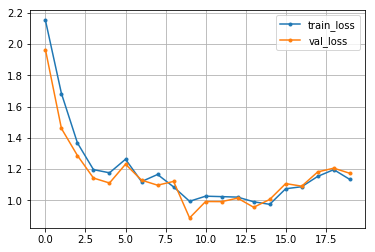

In [279]:
# loss可視化
plt.plot(scr_cnn.loss, marker=".", label="train_loss")
plt.plot(scr_cnn.val_loss, marker=".", label="val_loss")

plt.grid()
plt.legend()
plt.show()

### for文をなるべく少なく、tensordotというメソッドがあることを知り、そこから色々と改変しました。initializerなどもfitを回すために改変したため、振り返って戻すこともできないレベルですが、lossは減少しており、accも程々になりましたので、提出させていただきます。

### 問題5のパディングはクラスとして作成したものの、最後の推定問題のクラスには導入しませんでした。問題6のミニバッチ対応は、意識はしておりませんでしたが、最後の推定で無事回ったので問題ないものと思います。問題7のアドバンスは改変に改変を繰り返した結果、複雑になりすぎた為できておりません。